Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.

Необходимо:

Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

In [35]:
import pandas as pd
import re

In [36]:
data_company = pd.read_excel('data/Data_Company.xlsx')
print(data_company.head())

       brand Category      item_id color_id  current price
0  Valentino    Shoes  aaaaa111111    black            247
1  Valentino    Shoes  aaaaa111112    black            161
2  Valentino    Shoes  aaaaa111113    black            234
3  Valentino    Shoes  aaaaa111114    black            167
4  Valentino    Shoes  aaaaa111115    black            153


In [37]:
data_parsing = pd.read_excel('data/Data_TSUM.xlsx')
print(data_parsing.head(20))

        brand Category   producer_id producer_color  price
0   Valentino    Shoes  aaaaa1111_11          black    167
1   Valentino    Shoes  aaaaa1111_12          black    188
2   Valentino    Shoes  aaaaa1111_13          black    184
3   Valentino    Shoes  aaaaa1111_14        bla//ck    196
4   Valentino    Shoes  aaaaa1111_15        bla\\ck    250
5   Valentino    Shoes  aaaaa1111_16        bla__ck    191
6   Valentino    Shoes  aaaaa1111_17       bla\\c~k    218
7   Valentino    Shoes  aaaaa1111_18        white_~    162
8   Valentino    Shoes  aaaaa1111_19        white_~    236
9   Valentino    Shoes  aaaaa1111_20        white_~    178
10  Valentino    Shoes  aaaaa1111_21        white_~    171
11  Valentino    Shoes  aaaaa1111_22        white_~    237
12  Valentino    Shoes  aaaaa1111_23        white_~    288
13  Valentino    Shoes  aaaaa1111_24        white_~    259
14  Valentino     Bags  aaaaa1111_25         ~~~red    245
15  Valentino     Bags  aaaaa1111_26         ~~~red    2

In [38]:
        
data_parsing['producer_id']= data_parsing['producer_id'].replace(to_replace ='_', value = '', regex=True)
print (data_parsing.head())             

       brand Category  producer_id producer_color  price
0  Valentino    Shoes  aaaaa111111          black    167
1  Valentino    Shoes  aaaaa111112          black    188
2  Valentino    Shoes  aaaaa111113          black    184
3  Valentino    Shoes  aaaaa111114        bla//ck    196
4  Valentino    Shoes  aaaaa111115        bla\\ck    250


In [39]:
data_parsing['producer_color']= data_parsing['producer_color'].apply(lambda x: re.sub('[^A-Za-z0-9]', '', x))
print (data_parsing.head()) 

       brand Category  producer_id producer_color  price
0  Valentino    Shoes  aaaaa111111          black    167
1  Valentino    Shoes  aaaaa111112          black    188
2  Valentino    Shoes  aaaaa111113          black    184
3  Valentino    Shoes  aaaaa111114          black    196
4  Valentino    Shoes  aaaaa111115          black    250


In [40]:
merge_data = data_parsing.merge(data_company, how='left', left_on = 'producer_id', right_on = 'item_id')
print(merge_data.head())

     brand_x Category_x  producer_id producer_color  price    brand_y  \
0  Valentino      Shoes  aaaaa111111          black    167  Valentino   
1  Valentino      Shoes  aaaaa111112          black    188  Valentino   
2  Valentino      Shoes  aaaaa111113          black    184  Valentino   
3  Valentino      Shoes  aaaaa111114          black    196  Valentino   
4  Valentino      Shoes  aaaaa111115          black    250  Valentino   

  Category_y      item_id color_id  current price  
0      Shoes  aaaaa111111    black            247  
1      Shoes  aaaaa111112    black            161  
2      Shoes  aaaaa111113    black            234  
3      Shoes  aaaaa111114    black            167  
4      Shoes  aaaaa111115    black            153  


In [41]:
merge_data = merge_data.drop(['brand_y', 'Category_y', 'item_id', 'color_id'], axis = 1)
print(merge_data.head())

     brand_x Category_x  producer_id producer_color  price  current price
0  Valentino      Shoes  aaaaa111111          black    167            247
1  Valentino      Shoes  aaaaa111112          black    188            161
2  Valentino      Shoes  aaaaa111113          black    184            234
3  Valentino      Shoes  aaaaa111114          black    196            167
4  Valentino      Shoes  aaaaa111115          black    250            153


In [42]:
merge_data['price_ratio'] = merge_data['price']/merge_data['current price']
print(merge_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_x         75 non-null     object 
 1   Category_x      75 non-null     object 
 2   producer_id     75 non-null     object 
 3   producer_color  75 non-null     object 
 4   price           75 non-null     int64  
 5   current price   75 non-null     int64  
 6   price_ratio     75 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.2+ KB
None


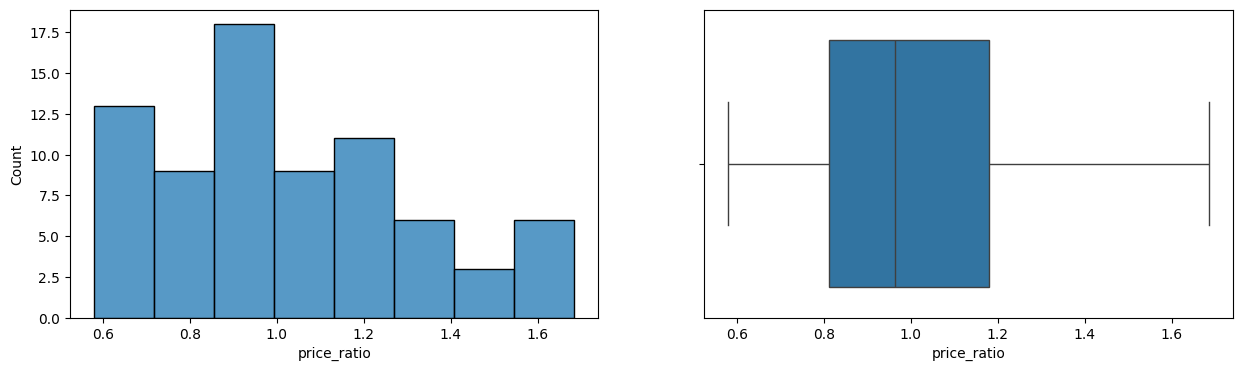

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,4))
histplot = sns.histplot(data = merge_data, x = 'price_ratio', ax=axes[0]);
boxplot = sns.boxplot(data = merge_data, x ='price_ratio', ax=axes[1])

In [44]:
import numpy as np
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(merge_data, 'price_ratio', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 75


Распределение разницы в ценах выглядит почти нормальным. Выбросов по методу Z-отклонений не выявлено.

In [48]:
cleaned.to_excel('data/cleaned_parsing.xlsx', index=False)